                                         Bank Customer Churn Prediction

In [ ]:
#Introduction:

Here my data set contains a bank customer informations, and I will study these different factors and see how it will affect
the customer churn, Knowing these factors will help to predict the customers who will churn and help the marketing section 
to target those customers and try to bring them back to the bank.

Here I will import the libraries which we need to find different statistics and for visualizing the data

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import statsmodels.api as sm

Now, I will start with our data set.
It contains many features like:the profile of each customer(name,customerID,age,gender and customer country),
also, it contains other features about his behavior in the bank(Tenure, num of products,balance and so on)

In [423]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [417]:
y=df[df['NumOfProducts']==4]
y.count()


RowNumber          60
CustomerId         60
Surname            60
CreditScore        60
Geography          60
Gender             60
Age                60
Tenure             60
Balance            60
NumOfProducts      60
HasCrCard          60
IsActiveMember     60
EstimatedSalary    60
Exited             60
dtype: int64

In [ ]:
#Begin the analysis:

So, I will start with describing the data we have:
We have 10,000 customers with mean of their ages around 38 years and the mean of their subscribing is 5 years where the 
oldest customers have been in the bank for 10 years which means that the bank is somehow new.

In [544]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.0,1.0,0.0,1.0,0.0
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.0,0.0,0.0,0.0,0.0
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.0,1.0,0.0,1.0,0.0
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.0,1.0,0.0,1.0,0.0
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.0,1.0,0.0,1.0,0.0
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.0,1.0,0.0,1.0,0.0
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,0.0,1.0,0.0,1.0,0.0


Here, I want to take a look on the types of our data

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Check for null value beacuse if there are null values we have to deal with them in different ways,
but here we do not have null value to deal with

In [420]:
#check null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Check if there is duplicated rows, here there is no duplication

In [149]:
df_duplicates = df.duplicated()
print ('Number of duplicate entries is/are {}'.format(df_duplicates.sum()))

Number of duplicate entries is/are 0


Now, I want to check the unique values:
here, of course the customerId is unique for every customer, the customer name(surname) is duplicated because in this data
they just took the first name of the customer, for credit score value ,as we saw in the discribtion, lies between 
350 and 850 so I think its normal to have just 460 distinct values.
The other variables are classification variables and they have values between 1 and 4

In [151]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
#Visualization:

Now, I will start visualizing the data.
first, I want to see the percentage of churners against the percentage of the customers who still in the bank,
and I found that there is about 20% churners and since it is small in somehow, we want to build a model which can have
a good accurecy to predict those chernes to target them with offers to avoid losing them

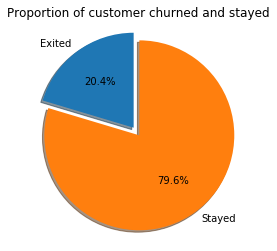

In [546]:
labels = 'Exited', 'Stayed'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(4, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and stayed")
plt.show()

Here, I want to see if there is a good relation ship between churners and their tenure in the bank.
Although most churnrs are those who had subscribed for one year but I still do'nt see in this data that there is 
arelation ship between churners and their tenure

Text(0.5, 1.0, 'Distribution of churners with respect to their tenure')

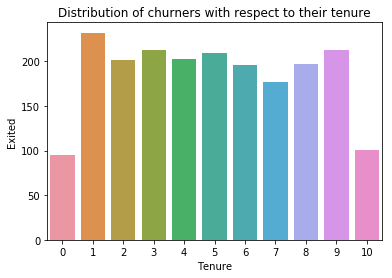

In [427]:
ex_tenure= pd.DataFrame(df[df['Exited']==1].groupby('Tenure')['Exited'].sum())
my_plot = sns.barplot(x=ex_tenure.index, y=ex_tenure['Exited'])
plt.title('Distribution of churners with respect to their tenure')

Here, I tried to find if there is a relation ship between the churners and where they came from so obviously
 Spanish people has the lowest churn rate but that is not a real evidence because may be the number of Spanish subs
 are less than the subs from France and Germany,so we will draw another graph and see.

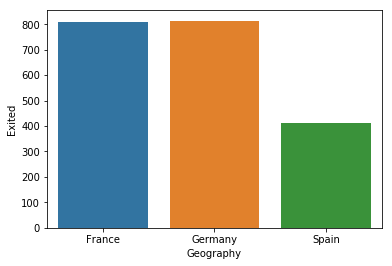

In [243]:
EX_GEO = pd.DataFrame(df[df['Exited']==1].groupby('Geography')['Exited'].sum())
my_plot = sns.barplot(x=EX_GEO.index, y=EX_GEO['Exited'])

So, here I found the percentage of churn in each geography and I found that highest percentage of churn is in 
Germany   customers with percent of churn =32% of the total churn,
and so I think that it might be a relation between churn and the geography

  Geography  count  count_chu  pct_churn
0    France   5014        810  16.154767
1   Germany   2509        814  32.443204
2     Spain   2477        413  16.673395


Text(0.5, 1.0, 'Percentage of churners per country')

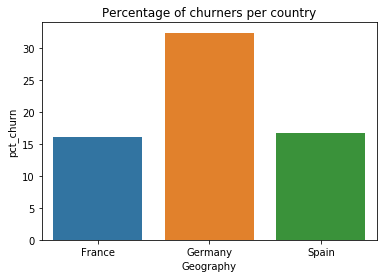

In [547]:
Geo_count=df.groupby('Geography')['CustomerId'].count()
Geo_count_chu=df[df['Exited']==1].groupby('Geography')['Exited'].sum()
x_df=pd.DataFrame({'Geography': Geo_count.index,'count':Geo_count.values})
y_df=pd.DataFrame({'Geography':Geo_count_chu.index,'count_chu':Geo_count_chu.values})
merged_df=pd.merge(x_df, y_df, on='Geography')
merged_df['pct_churn']=(merged_df['count_chu'] / merged_df['count'] )*100
print(merged_df)
#
merged_df.set_index('Geography',inplace=True)
pct_plot = sns.barplot(x=merged_df.index, y=merged_df['pct_churn'])
plt.title('Percentage of churners per country')

Now, I will see how does the gender affect the churn and here we can see that the percentage of female churners
is greater than the male churner.

   Gender  count  count_chu  pct_churn
0  Female   4543       1139  25.071539
1    Male   5457        898  16.455928


Text(0.5, 1.0, 'Percent of churner VS Gender')

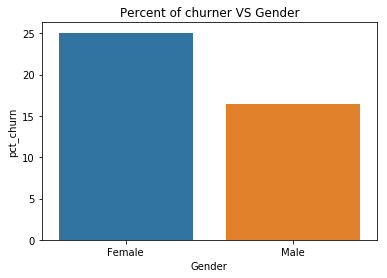

In [545]:
Gender_count=df.groupby('Gender')['CustomerId'].count()
Gender_count_chu=df[df['Exited']==1].groupby('Gender')['Exited'].sum()
gender_df=pd.DataFrame({'Gender': Gender_count.index,'count':Gender_count.values})
gender_df_chu=pd.DataFrame({'Gender':Gender_count_chu.index,'count_chu':Gender_count_chu.values})
merged_gender=pd.merge(gender_df, gender_df_chu, on='Gender')
merged_gender['pct_churn']=(merged_gender['count_chu'] / merged_gender['count'] )*100
print(merged_gender)
#
merged_gender.set_index('Gender',inplace=True)
pct_plot = sns.barplot(x=merged_gender.index, y=merged_gender['pct_churn'])
plt.title('Percent of churner VS Gender')

Here, I draw the relation between percent of churners and number of products(could be accounts) they have.
And here the most churners are customers with four bank account which seems to be unreal.

   NumOfProducts  count  count_chu   pct_churn
0              1   5084       1409   27.714398
1              2   4590        348    7.581699
2              3    266        220   82.706767
3              4     60         60  100.000000


Text(0.5, 1.0, 'Percentage of churners VS #products they have')

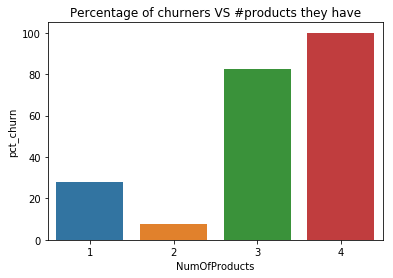

In [548]:
product_count=df.groupby('NumOfProducts')['CustomerId'].count()
product_count_chu=df[df['Exited']==1].groupby('NumOfProducts')['Exited'].sum()
product_df=pd.DataFrame({'NumOfProducts': product_count.index,'count':product_count.values})
product_df_chu=pd.DataFrame({'NumOfProducts':product_count_chu.index,'count_chu':product_count_chu.values})
merged_product=pd.merge(product_df, product_df_chu, on='NumOfProducts')
merged_product['pct_churn']=(merged_product['count_chu'] / merged_product['count'] )*100
print(merged_product)
#
merged_product.set_index('NumOfProducts',inplace=True)
pct_plot = sns.barplot(x=merged_product.index, y=merged_product['pct_churn'])
plt.title('Percentage of churners VS #products they have')

Here are general graphs between (churner,stayed) customers and other classification variables:
a)The first and the second graphs we interpreted them above
b)The third graph shows the relation between having Crcard and churn. Here, it seems that many customers have crcard 
which seems interesting to me.
c)The forth figure shows the relation between being active member an churn. Regardless the factors they used to decide
if the customer active or not I think that being inactive customer will mean high rate of churn, also I think 
that the number of inactive customers are high which means that they have to do something to change these customer status
from inactive to active


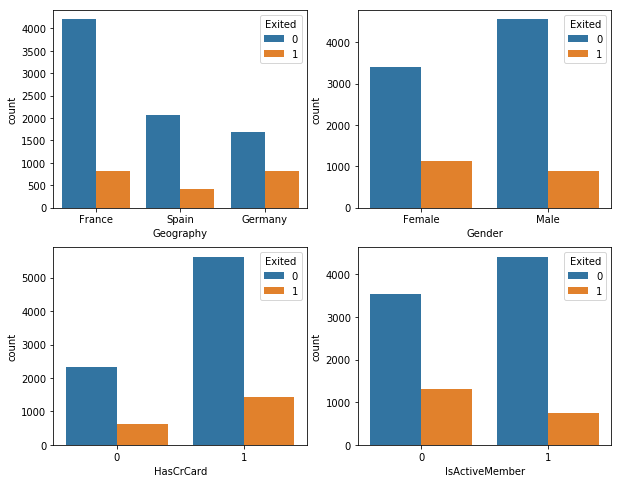

In [300]:
#classification variables
fig, axarr = plt.subplots(2, 2, figsize=(10, 8))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])                        

And now, we will see graphs between (churner,stayed) customers and other numeric variables:
a) The first one shows that the most churners are the newest and older subs which means that they have
 to do more programms to those customers.
b) The second graph shows that there is no significiance difference in credit scoring for churners and stayed customers.



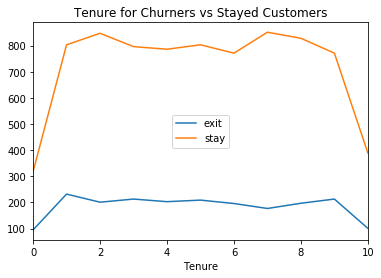

In [445]:
ten_count_chu=df[df['Exited']==1].groupby('Tenure')['Exited'].count()
ten_count_stay=df[df['Exited']==0].groupby('Tenure')['Exited'].count()
ten_count_chu.plot(label='exit')
ten_count_stay.plot(label='stay')
plt.legend()
plt.title('Tenure for Churners vs Stayed Customers')
plt.show()

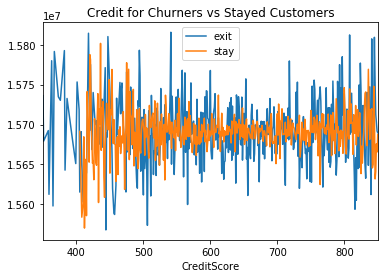

In [450]:
credit_count_chu =df[df['Exited']==1].groupby('CreditScore')['CustomerId'].mean()
credit_count_stay=df[df['Exited']==0].groupby('CreditScore')['CustomerId'].mean()
credit_count_chu.plot(label='exit')
credit_count_stay.plot(label='stay')
plt.legend()
plt.title('Credit for Churners vs Stayed Customers')
plt.show()

So, I want to find a relation ships between the variables with each other not just the 
variables and the churners or stayed people:
I start with Tenure and the number of products and I took the mean of the years in each number of products.
Actually, there is not a big difference but in somehow the oldest customers have on average 
more products than the newest ones.

                 Tenure
NumOfProducts          
1              4.974626
2              5.051852
3              5.003759
4              5.300000


Text(0.5, 1.0, 'mean of tenure VS #products')

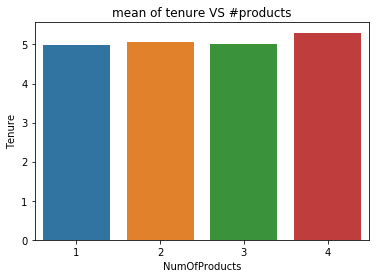

In [550]:
Pro_Ten = df.groupby('NumOfProducts')['Tenure'].mean()
ten_nopro=pd.DataFrame({'NumOfProducts':Pro_Ten.index,'Tenure':Pro_Ten.values})
ten_nopro.set_index('NumOfProducts',inplace=True)
my_pl = sns.barplot(x=ten_nopro.index, y=ten_nopro['Tenure'])
print(ten_nopro)
plt.title('mean of tenure VS #products')

                                           Is The Data Real ?

So, here from the previous analysis there were some strange results which makes me feel that the data may be not real:
some of those :
1) The tenure for churners does not have a real differences, but from experiance the churn for new customers used to be higher
   from old ones.
2) The percent of churners in Spain and France are almost the same and Germany is double of that percent which seems fake.
3) The customers who had 4 accounts are all churners also there is big number of churnres who have 3 accounts which is weired.
4) The average tenure for customers in each number of products is around 5 years.

In [454]:
#Data Praparation:

Now for Geography we will split it into three columns each of which describes if the customer from that country or not
the same thing I will do for gender

In [455]:
for i in df['Geography']:
    if i=='Spain':
        df['Geography_Spain']=1
    else:
        df['Geography_Spain']=0
    if i=='France':
        df['Geography_France']=1
    else:
        df['Geography_France']=0
    if i=='Germany':
        df['Geography_Germany']=1
    else:
        df['Geography_Germany']=0

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Spain,Geography_France,Geography_Germany
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,1,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [457]:
for j in df['Gender']:
    if j=='Female':
        df['Gender_Female']=1
    else:
        df['Gender_Female']=0
    if j=='Male':
        df['Gender_Male']=1
    else:
        df['Gender_Male']=0
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,1,0,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,1,0,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,1,0,1,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


Now, we will start preparing the data to be able to do the logistic regression.
Fisrt of all we divide variables into features variables(independent variables) and label variable
(dependent variable, here Exited) 

In [458]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import train_test_split
from sklearn import metrics

In [552]:
feature_cols = ['CreditScore', 'Age', 'Tenure','NumOfProducts','HasCrCard','IsActiveMember',
               'EstimatedSalary','Balance', 'Geography_Spain','Geography_France',
                'Geography_Germany','Gender_Female','Gender_Male']
X = df[feature_cols] # Features
y = df['Exited'] # Target variable


Now,we will split our data set To understand model performance, dividing the dataset into a training set
 and a test set is a good strategy.

In [553]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print(len(X_train))
print(len(X_test))


8000
2000


Here, the Dataset is broken into two parts. It means 80% data will be used for model training and 20% for model testing.

In [554]:
#Logistic Regression:

Now we will do the logistic regression with defult parameters
then we will fit the model with the data.

In [555]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [556]:
# Predictions:

Now we will do the prediction

In [557]:
y_pred=logreg.predict(X_test)

In [558]:
# Evaluation:

Now, we want to find the confusion matrix which is a table that is used to evaluate the performance
 of a classification model. The fundamental of a confusion matrix is the number of correct 
 and incorrect predictions are summed up class-wise.

In [559]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[1553,   42],
       [ 380,   25]], dtype=int64)

Here, 1553 and 25 are the accurate predictions while 42 and 380 are the incorrect predictions

Now, we will visualize the confusion matrex using the Heatmap

Text(0.5, 257.44, 'Predicted label')

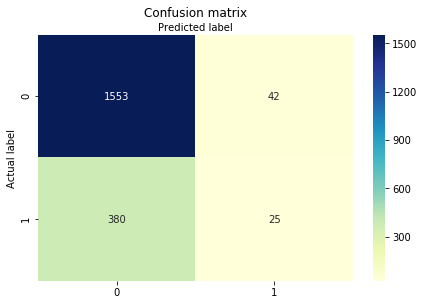

In [560]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

And now we will do evaluation to the model using model evaluation metrics such as accuracy, precision, and recall.

In [561]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.789
Precision: 0.373134328358209
Recall: 0.06172839506172839


So, here we get accuracy arround 80% which is good accurecy.
Precision is when a model makes a prediction, how often it is correct, in our mdel we want to predict the customer 
churn and when we do that arround 40% of them will be churners
recall is when we make the prediction how many churners we will capture. Here, the percentage is very low aboyt 6% which 
is bad

Now, we will plot the Roc curve which is between true positive rate against the false positive rate.
Here, AUC score for the case is 0.67. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

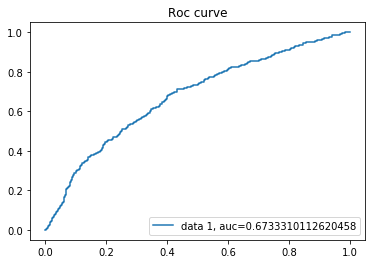

In [563]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('Roc curve')
plt.show()


Doing logistic regression using statsmodels:

In [474]:
import statsmodels.formula.api as sm

Now from features column and label column defined above, we will do the regression

In [538]:
feature = ['CreditScore', 'Age', 'Tenure','NumOfProducts','HasCrCard','IsActiveMember'
               ]
X = df[feature] # Features
y = df['Exited'] # Target variable

In [539]:
model = sm.Logit(df['Exited'],df[feature])
 
result=model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.456316
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Sun, 30 Jun 2019   Pseudo R-squ.:                 0.09728
Time:                        23:27:23   Log-Likelihood:                -4563.2
converged:                       True   LL-Null:                       -5054.9
                                        LLR p-value:                2.295e-210
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
CreditScore       -0.0036      0.000    -21.047      0.000      -0.004      -0.003
Age                0.0580      0.002     25.636      0.000       0.054       0.062
Tenure            -0.0410      0.009     -4.626      0.000      -0.058      -0.024
NumOfProducts     -0.3600      0.043     -8.299      0.000      -0.445      -0.275
HasCrCard         -0.1896      0.055     -3.421      0.001      -0.298      -0.081
IsActiveMember    -1.0801      0.055    -19.509      0.000      -1.189      -0.972
==================================================================================
"""

so here we see that variables Credit score , Age, Tenure, Numof products, has crcard and is active member all are highly corrolated to the existance in the bank or not

In [ ]:
#Conclusion:

However, in as much as the model has a high accuracy, it still misses many(Actually most) who end up churning. 
This could be imprved by providing retraining the model with more data over time while in the meantime
working with the model to save the 40% that would have churned. I also think that the way of fitting the data and the way 
which I used to predict the churn may be not the best way also, if I could add some other features the results will be
different and thats what I will work on in the next versions.

In [ ]:
#The End of version one of analysis and prediction